In [2]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV5
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH 

In [3]:
VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data, charge_index_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [4]:
encoder, autoencoder, sess = autoencoderV5(4)

../models/RNN_autoencoder5.py:66: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge_layer = L.merge([dense_1_vl, dense_1_vh], mode='concat', name='merge_layer')
/home/gil/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


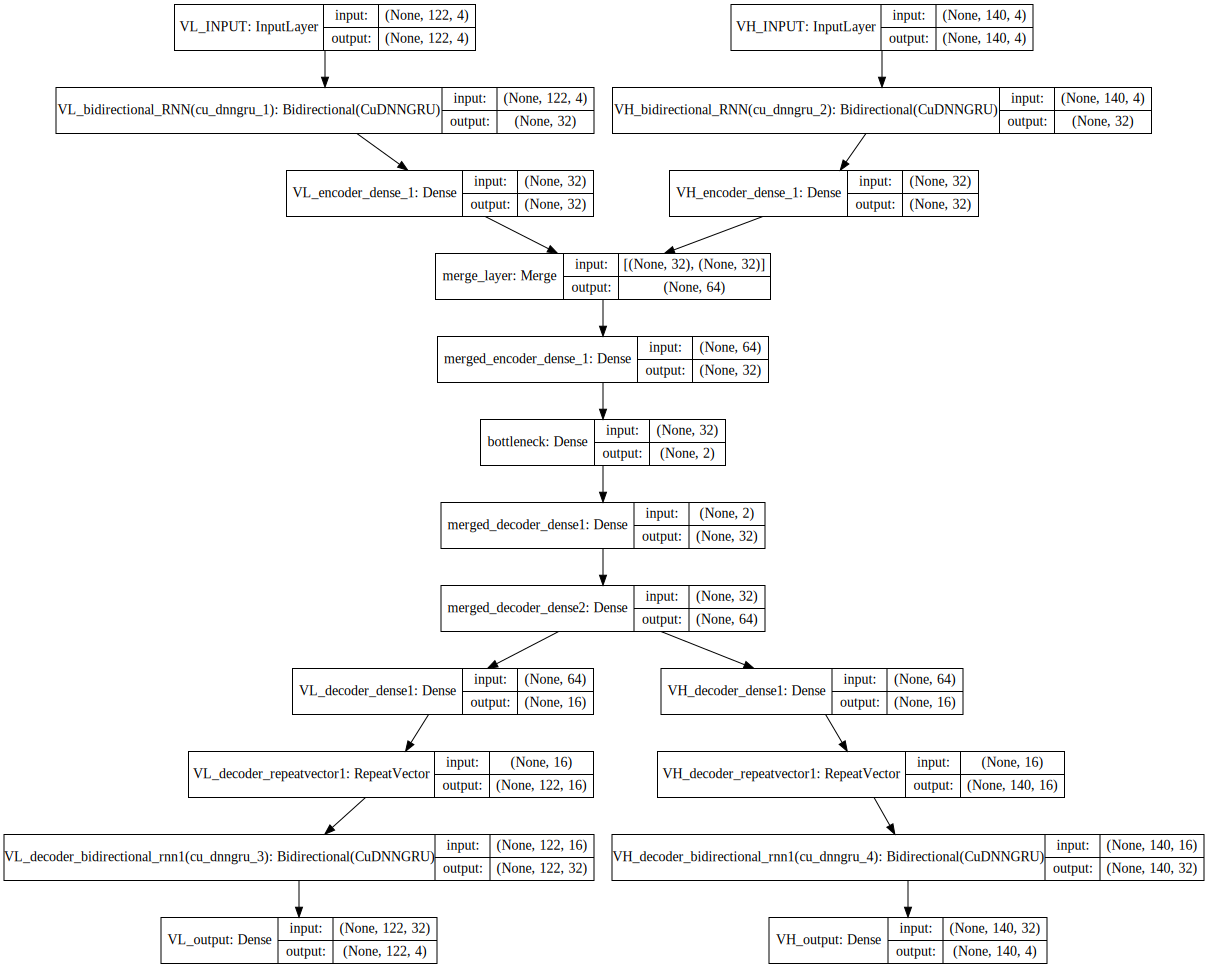

In [5]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
NAME= 'autoencoderV5'
RUN = 'run1'

weight_path = '../model_weights/{}/{}/{}_allfeatures.hdf5'.format(NAME,RUN,NAME)
log_path = '../logs/{}/{}'.format(NAME, RUN)

In [ ]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled],
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint(weight_path, save_best_only=True),
                                     keras.callbacks.TensorBoard(log_path)])

Train on 1706 samples, validate on 427 samples
Epoch 1/2000
1706/1706 [==============================] - 7s 4ms/step - loss: 0.9583 - VL_output_loss: 0.4806 - VH_output_loss: 0.4777 - val_loss: 0.5189 - val_VL_output_loss: 0.2569 - val_VH_output_loss: 0.2621
Epoch 2/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.5172 - VL_output_loss: 0.2558 - VH_output_loss: 0.2614 - val_loss: 0.5150 - val_VL_output_loss: 0.2552 - val_VH_output_loss: 0.2598
Epoch 3/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.5156 - VL_output_loss: 0.2550 - VH_output_loss: 0.2606 - val_loss: 0.5139 - val_VL_output_loss: 0.2547 - val_VH_output_loss: 0.2592
Epoch 4/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.5148 - VL_output_loss: 0.2546 - VH_output_loss: 0.2601 - val_loss: 0.5132 - val_VL_output_loss: 0.2544 - val_VH_output_loss: 0.2588
Epoch 5/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.5141 - VL_output_loss: 0.

1706/1706 [==============================] - 2s 1ms/step - loss: 0.4964 - VL_output_loss: 0.2493 - VH_output_loss: 0.2471 - val_loss: 0.4946 - val_VL_output_loss: 0.2487 - val_VH_output_loss: 0.2460
Epoch 40/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4961 - VL_output_loss: 0.2491 - VH_output_loss: 0.2470 - val_loss: 0.4942 - val_VL_output_loss: 0.2485 - val_VH_output_loss: 0.2457
Epoch 41/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4960 - VL_output_loss: 0.2491 - VH_output_loss: 0.2469 - val_loss: 0.4943 - val_VL_output_loss: 0.2485 - val_VH_output_loss: 0.2457
Epoch 42/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4958 - VL_output_loss: 0.2490 - VH_output_loss: 0.2468 - val_loss: 0.4940 - val_VL_output_loss: 0.2484 - val_VH_output_loss: 0.2456
Epoch 43/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4957 - VL_output_loss: 0.2489 - VH_output_loss: 0.2468 - val_loss: 0.4938 - val_V

1706/1706 [==============================] - 2s 1ms/step - loss: 0.4729 - VL_output_loss: 0.2342 - VH_output_loss: 0.2387 - val_loss: 0.4711 - val_VL_output_loss: 0.2336 - val_VH_output_loss: 0.2375
Epoch 78/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4722 - VL_output_loss: 0.2337 - VH_output_loss: 0.2385 - val_loss: 0.4706 - val_VL_output_loss: 0.2332 - val_VH_output_loss: 0.2374
Epoch 79/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4711 - VL_output_loss: 0.2329 - VH_output_loss: 0.2382 - val_loss: 0.4687 - val_VL_output_loss: 0.2319 - val_VH_output_loss: 0.2368
Epoch 80/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4702 - VL_output_loss: 0.2324 - VH_output_loss: 0.2377 - val_loss: 0.4692 - val_VL_output_loss: 0.2329 - val_VH_output_loss: 0.2363
Epoch 81/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4694 - VL_output_loss: 0.2322 - VH_output_loss: 0.2372 - val_loss: 0.4667 - val_V

1706/1706 [==============================] - 2s 1ms/step - loss: 0.4402 - VL_output_loss: 0.2212 - VH_output_loss: 0.2189 - val_loss: 0.4409 - val_VL_output_loss: 0.2219 - val_VH_output_loss: 0.2190
Epoch 116/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4387 - VL_output_loss: 0.2206 - VH_output_loss: 0.2181 - val_loss: 0.4371 - val_VL_output_loss: 0.2198 - val_VH_output_loss: 0.2173
Epoch 117/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4381 - VL_output_loss: 0.2204 - VH_output_loss: 0.2177 - val_loss: 0.4363 - val_VL_output_loss: 0.2196 - val_VH_output_loss: 0.2167
Epoch 118/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4375 - VL_output_loss: 0.2200 - VH_output_loss: 0.2175 - val_loss: 0.4356 - val_VL_output_loss: 0.2193 - val_VH_output_loss: 0.2163
Epoch 119/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4367 - VL_output_loss: 0.2200 - VH_output_loss: 0.2167 - val_loss: 0.4349 - v

1706/1706 [==============================] - 2s 1ms/step - loss: 0.4187 - VL_output_loss: 0.2110 - VH_output_loss: 0.2077 - val_loss: 0.4195 - val_VL_output_loss: 0.2114 - val_VH_output_loss: 0.2080
Epoch 154/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4183 - VL_output_loss: 0.2108 - VH_output_loss: 0.2075 - val_loss: 0.4182 - val_VL_output_loss: 0.2098 - val_VH_output_loss: 0.2083
Epoch 155/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4180 - VL_output_loss: 0.2107 - VH_output_loss: 0.2073 - val_loss: 0.4183 - val_VL_output_loss: 0.2108 - val_VH_output_loss: 0.2075
Epoch 156/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4168 - VL_output_loss: 0.2099 - VH_output_loss: 0.2070 - val_loss: 0.4183 - val_VL_output_loss: 0.2097 - val_VH_output_loss: 0.2086
Epoch 157/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4169 - VL_output_loss: 0.2097 - VH_output_loss: 0.2072 - val_loss: 0.4179 - v

1706/1706 [==============================] - 2s 1ms/step - loss: 0.4037 - VL_output_loss: 0.2037 - VH_output_loss: 0.2000 - val_loss: 0.4064 - val_VL_output_loss: 0.2062 - val_VH_output_loss: 0.2002
Epoch 192/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4030 - VL_output_loss: 0.2032 - VH_output_loss: 0.1997 - val_loss: 0.4049 - val_VL_output_loss: 0.2047 - val_VH_output_loss: 0.2001
Epoch 193/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4029 - VL_output_loss: 0.2033 - VH_output_loss: 0.1996 - val_loss: 0.4047 - val_VL_output_loss: 0.2043 - val_VH_output_loss: 0.2004
Epoch 194/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4021 - VL_output_loss: 0.2028 - VH_output_loss: 0.1993 - val_loss: 0.4028 - val_VL_output_loss: 0.2032 - val_VH_output_loss: 0.1996
Epoch 195/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.4019 - VL_output_loss: 0.2029 - VH_output_loss: 0.1990 - val_loss: 0.4017 - v

1706/1706 [==============================] - 2s 1ms/step - loss: 0.3934 - VL_output_loss: 0.1984 - VH_output_loss: 0.1950 - val_loss: 0.3944 - val_VL_output_loss: 0.1990 - val_VH_output_loss: 0.1954
Epoch 230/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.3920 - VL_output_loss: 0.1978 - VH_output_loss: 0.1942 - val_loss: 0.3928 - val_VL_output_loss: 0.1979 - val_VH_output_loss: 0.1949
Epoch 231/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.3916 - VL_output_loss: 0.1973 - VH_output_loss: 0.1943 - val_loss: 0.3938 - val_VL_output_loss: 0.1989 - val_VH_output_loss: 0.1949
Epoch 232/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.3920 - VL_output_loss: 0.1973 - VH_output_loss: 0.1948 - val_loss: 0.3935 - val_VL_output_loss: 0.1990 - val_VH_output_loss: 0.1945
Epoch 233/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.3912 - VL_output_loss: 0.1973 - VH_output_loss: 0.1939 - val_loss: 0.3923 - v